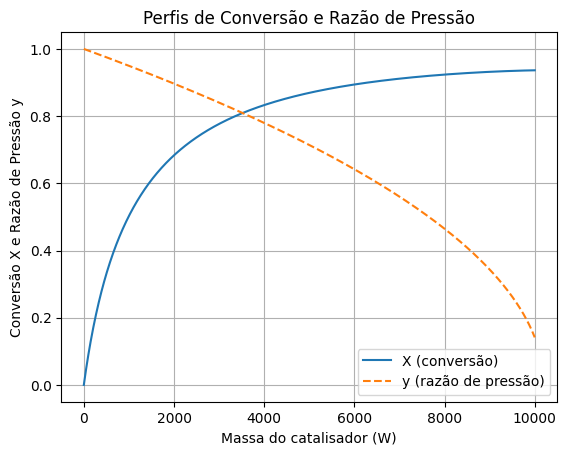

In [23]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Definir as constantes
k = 0.00087
Kp = 1.39
Ka = 1.038
alfa = 9.8e-5
FTo = 50
PTo = 40


def dX_dw(X, W):
    y = np.sqrt(1 - alfa * W)
    Pa = PTo * (1 - X) * y
    Pb = PTo * (1.5 - X) * y
    Pp = PTo * X * y
    ra = (k * Pa * Pb) / (1 + Kp * Pp + Ka * Pa)
    return ra / FTo


W = np.linspace(0, 10000, 1000)

X0 = 0  # Conversão inicial
X = odeint(dX_dw, X0, W).flatten()

y = np.sqrt(1 - alfa * W)

# Plotar os resultados
plt.plot(W, X, label='X (conversão)')
plt.plot(W, y, label='y (razão de pressão)', linestyle='--')

plt.xlabel('Massa do catalisador (W)')
plt.ylabel('Conversão X e Razão de Pressão y')
plt.title('Perfis de Conversão e Razão de Pressão')
plt.grid(True)
plt.legend()
plt.show()


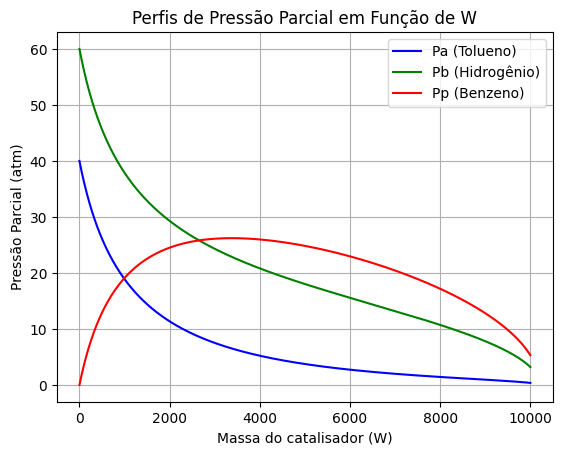

In [63]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt



W = np.linspace(0, 10000, 1000)


X0 = 0  # Conversão inicial
X = odeint(dX_dw, X0, W).flatten()


y = np.sqrt(1 - alfa * W)

Pa = PTo * (1 - X) * y
Pb = PTo * (1.5 - X) * y
Pp = PTo * X * y

# Plotar os resultados
plt.plot(W, Pa, label='Pa (Tolueno)', color='blue')
plt.plot(W, Pb, label='Pb (Hidrogênio)', color='green')
plt.plot(W, Pp, label='Pp (Benzeno)', color='red')

plt.xlabel('Massa do catalisador (W)')
plt.ylabel('Pressão Parcial (atm)')
plt.title('Perfis de Pressão Parcial em Função de W')
plt.grid(True)
plt.legend()
plt.show()


A área sob a curva 1/ra vs X é: 200.0009


/tmp/ipykernel_626896/4226549145.py:50: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area = np.trapz(inverse_ra_clean, X_clean)


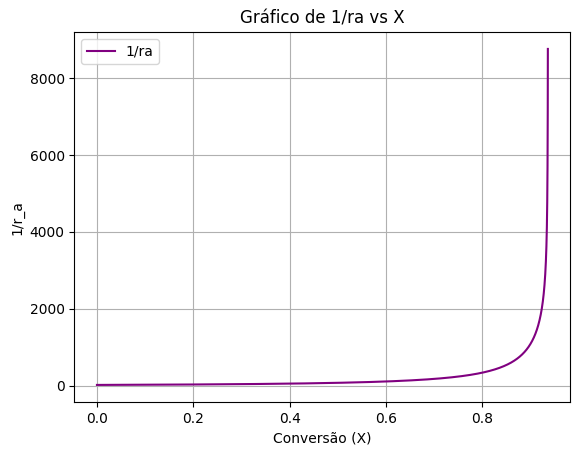

In [61]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Definir as constantes
k = 0.00087
Kp = 1.39  # Constante associada à pressão parcial de Pp
Ka = 1.038  # Constante associada à pressão parcial de Pa
alfa = 9.8e-5
FTo = 50
PTo = 40


def dX_dw(X, W):
    y = np.sqrt(1 - alfa * W)  
    Pa = PTo * (1 - X) * y     
    Pb = PTo * (1.5 - X) * y   
    Pp = PTo * X * y           
    ra = (k * Pa * Pb) / (1 + Kp * Pp + Ka * Pa)  
    return ra / FTo  


W = np.linspace(0, 10000, 1000)


X0 = 0  
X = odeint(dX_dw, X0, W).flatten()


y = np.sqrt(1 - alfa * W)


Pa = PTo * (1 - X) * y
Pb = PTo * (1.5 - X) * y
Pp = PTo * X * y

# Calcular r_a
ra = (k * Pa * Pb) / (1 + Kp * Pp + Ka * Pa)

ra_nonzero = np.where(ra != 0, ra, np.nan)

# Calcular 1/ra
inverse_ra = 1 / ra_nonzero

# Remover valores NaN para integração
X_clean = X[~np.isnan(inverse_ra)]
inverse_ra_clean = inverse_ra[~np.isnan(inverse_ra)]

# Calcular a área sob a curva usando o método dos trapézios
area = np.trapz(inverse_ra_clean, X_clean)
print(f"A área sob a curva 1/ra vs X é: {area:.4f}")

# Plotar 1/ra versus X
plt.plot(X, inverse_ra, label='1/ra', color='purple')

plt.xlabel('Conversão (X)')
plt.ylabel('1/r_a')
plt.title('Gráfico de 1/ra vs X')
plt.grid(True)
plt.legend()
plt.show()


In [62]:
#Como a area abaixo da curva é = 200.0009

w = 200.0009 * FTo
w


10000.045